<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Regresión lineal***

creando clase StratchLiearRegesion

In [1]:
import numpy as np
import pandas as pd

In [2]:
class ScratchLinearRegression():

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record to loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples = X.shape[0]
        n_features = X.shape[1]

        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])

        # Prepare theta for hypothesis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))

        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)

            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)

        if self.verbose:
            # Output learning process when  verbose is set to True
            print(f'Loss: {self.loss}')
            print(f'Val_loss: {self.val_loss}')
        pass

    def predict(self, X):
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        return np.dot(X, self.theta.T)

    def _linear_hypothesis(self, X):
        y_hyp = np.dot(X, self.theta.T)
        return y_hyp

    def _gradient_descent(self, X, y, y_hyp):
        n_samples = X.shape[0]
        update_theta = self.theta - (self.lr * np.dot((y_hyp -y), X)/n_samples)
        return update_theta

    def _loss_function(self, y_pred, y):
        loss = np.mean((y_pred -y)**2)/2
        return loss

def MSE(y_pred, y):
    n_samples = y.shape[0]
    mse = np.mean((y_pred - y)**2)
    return mse

## Preblema 1: función hipotética
- se implementa en def _linear_hypothesis(self, X)

## Problema 2: Steepest descent
- se implementa en def _gradient_descent(self, X, y, y_hyp)

## Problem 3: Estimated
- se implementa en def fit(self, X, y, X_val=None, y_val=None), def predict(self, X)

## Problema 4: Error cuadrático medio (MSE)
- se implementa en def mse(y_pred, y) (fuera de la clase)

## Problema 5: función Objetivo
- se implementa en def _loss_function(self, y_pred, y)

## **probando la clase construida**

In [3]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape

(5, 2)

In [4]:
# Let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [5]:
slr = ScratchLinearRegression(1000, 0.01, False, True)

In [6]:
theta  =slr.fit(X, y)

Loss: [4.59126333e+01 2.49115216e+00 3.28846744e-01 2.19967691e-01
 2.13292944e-01 2.11712527e-01 2.10393349e-01 2.09094825e-01
 2.07804934e-01 2.06523031e-01 2.05249037e-01 2.03982903e-01
 2.02724579e-01 2.01474017e-01 2.00231170e-01 1.98995989e-01
 1.97768428e-01 1.96548440e-01 1.95335977e-01 1.94130994e-01
 1.92933444e-01 1.91743282e-01 1.90560461e-01 1.89384937e-01
 1.88216665e-01 1.87055599e-01 1.85901695e-01 1.84754910e-01
 1.83615199e-01 1.82482519e-01 1.81356826e-01 1.80238077e-01
 1.79126229e-01 1.78021240e-01 1.76923068e-01 1.75831670e-01
 1.74747004e-01 1.73669030e-01 1.72597705e-01 1.71532989e-01
 1.70474841e-01 1.69423221e-01 1.68378087e-01 1.67339401e-01
 1.66307123e-01 1.65281212e-01 1.64261630e-01 1.63248337e-01
 1.62241295e-01 1.61240466e-01 1.60245810e-01 1.59257290e-01
 1.58274868e-01 1.57298507e-01 1.56328168e-01 1.55363815e-01
 1.54405411e-01 1.53452919e-01 1.52506303e-01 1.51565527e-01
 1.50630553e-01 1.49701348e-01 1.48777874e-01 1.47860098e-01
 1.46947982e-01 1.

In [7]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.05130673, 10.0323969 , 16.01348708, 21.99457725, 27.97566742])

In [8]:
MSE(y, slr_predict)

np.float64(0.0008970643402037281)


## Problema 6: Aprendizaje y estimación

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,133529.903976,163020.814954,148383.781932,230351.166858,137649.957715,195547.555004,179067.340046,110110.651139,193053.838267,115965.464349,...,52646.743718,145239.530394,221785.791978,172561.992036,104906.372731,362734.998862,163671.349755,134830.973578,134830.973578,141119.476654
1,136000.000000,158000.000000,173000.000000,395000.000000,171000.000000,251000.000000,190000.000000,128500.000000,284000.000000,99500.000000,...,39300.000000,142000.000000,214900.000000,79000.000000,100000.000000,359100.000000,224000.000000,139000.000000,75000.000000,141000.000000


In [14]:
mse_slr_houe = MSE(y_house_predict, y_test)
mse_slr_houe

np.float64(3412725955.4665656)

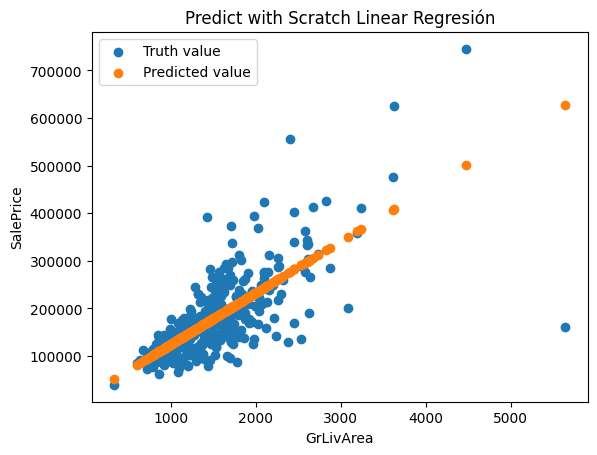

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regresión')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, y_house_predict, label='Predicted value')
plt.legend()
plt.show()

### Comparación con Scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predicted value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted value,133535.668863,163027.853052,148390.188105,230361.111808,137655.900477,195555.997379,179075.07092,110115.404948,193062.17298,115970.470926,...,52649.016637,145245.80082,221795.367135,172569.442055,104910.901855,362750.659217,163678.415939,134836.794636,134836.794636,141125.569206
Truth value,136000.000000,158000.000000,173000.000000,395000.000000,171000.000000,251000.000000,190000.00000,128500.000000,284000.00000,99500.000000,...,39300.000000,142000.00000,214900.000000,79000.000000,100000.000000,359100.000000,224000.000000,139000.000000,75000.000000,141000.000000


In [17]:
mse_lr = mean_squared_error(y_test, lr_predict)
mse_lr

3412728710.323327

In [18]:
print(f"{'ScratchLinearRegression:':25}{mse_slr_houe}\n{'Scikit-learn:':25}{mse_lr}")

ScratchLinearRegression: 3412725955.4665656
Scikit-learn:            3412728710.323327


## Problema 7: Graficar la curva de aprendizaje

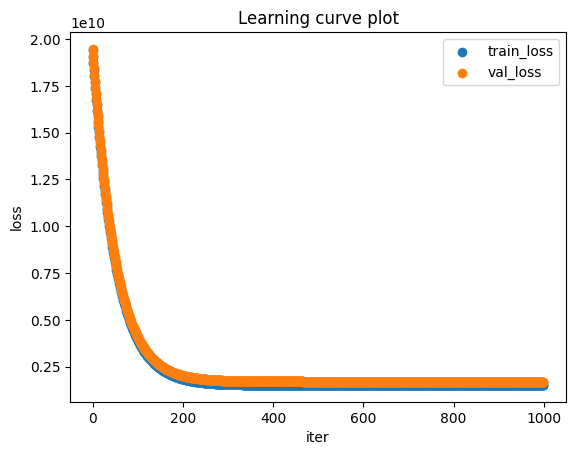

In [19]:
plt.title('Learning curve plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()

## Problema 8: eliminando el termino bias

In [20]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_predict = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_predict, y_test], index=['Predict value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict value,-47441.11676,-17950.205777,-32587.238801,49380.146137,-43321.063019,14576.534278,-1903.680683,-70860.369599,12082.817541,-65005.556389,...,-128324.27703,-35731.49034,40814.771256,-8409.028694,-76064.648008,181763.978161,-17299.670975,-46140.047157,-46140.047157,-39851.54408
Truth value,136000.00000,158000.000000,173000.000000,395000.000000,171000.000000,251000.000000,190000.000000,128500.000000,284000.000000,99500.000000,...,39300.00000,142000.00000,214900.000000,79000.000000,100000.000000,359100.000000,224000.000000,139000.000000,75000.000000,141000.00000


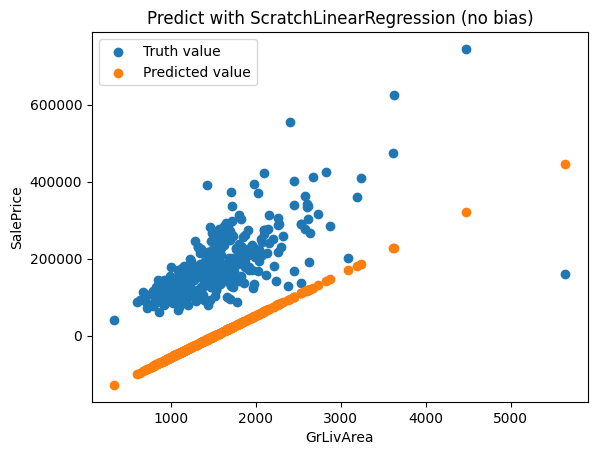

In [21]:
plt.title('Predict with ScratchLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_predict, label='Predicted value')
plt.legend()
plt.show()

# Problema 9: Multi-dimensional features

In [22]:
X = df[['GrLivArea', 'YearBuilt', 'YrSold']].values
y = df['SalePrice'].values


X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f"{X_train.shape = }\n{X_test.shape = }\n{y_train.shape = }\n{y_test.shape = }")

X_train.shape = (1095, 3)
X_test.shape = (365, 3)
y_train.shape = (1095,)
y_test.shape = (365,)


In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

srl_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,283517.114365,116390.365266,175060.782869,236290.399134,232692.331757,112615.816708,208342.099736,289050.595519,214073.256497,219032.887044,...,213905.367304,122797.732231,266738.171513,258079.869801,141187.782779,105077.845922,235328.310186,231711.666299,97249.417866,194542.424489
1,501837.000000,128000.000000,161750.000000,260000.000000,237500.000000,87000.000000,192000.000000,451950.000000,180000.000000,286000.000000,...,201000.000000,133500.000000,372500.000000,222500.000000,152000.000000,127000.000000,337500.000000,144000.000000,82000.000000,150000.000000


In [24]:
MSE(y_house_predict, y_test)

np.float64(2328221385.5560555)

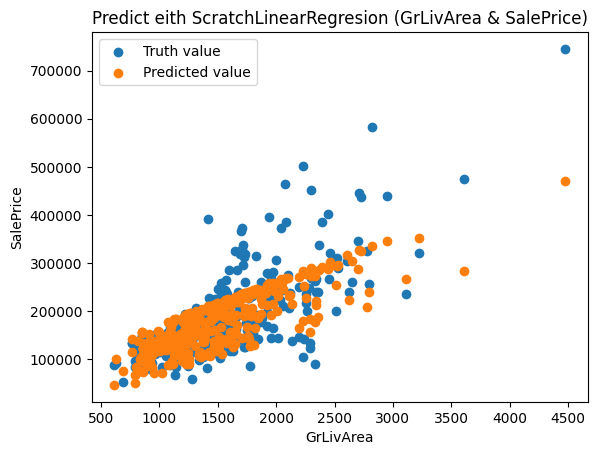


_____________________________________________________________________________



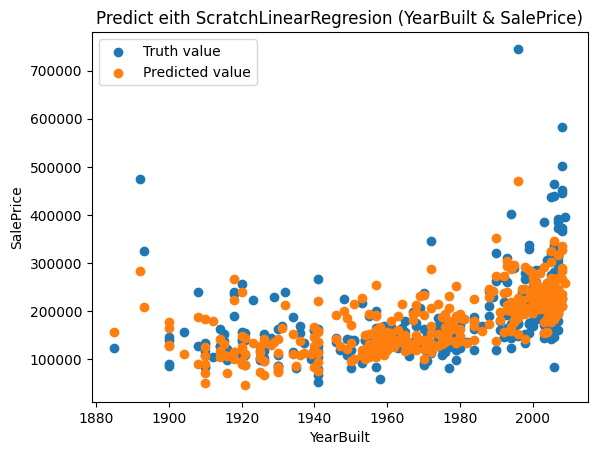


_____________________________________________________________________________



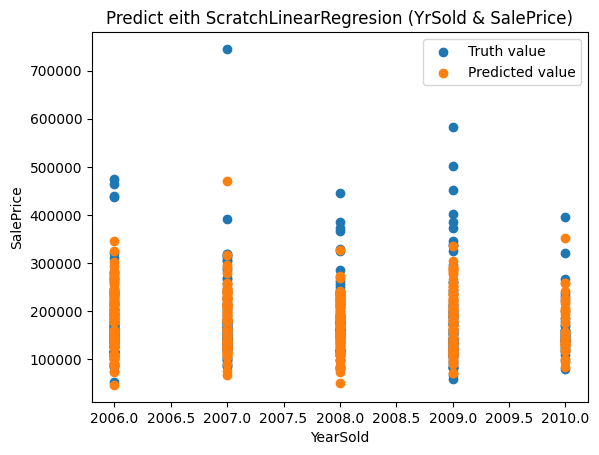

In [26]:
plt.title('Predict eith ScratchLinearRegresion (GrLivArea & SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test[:,0], y_test, label='Truth value')
plt.scatter(X_test[:,0], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

print("\n_____________________________________________________________________________\n")

plt.title('Predict eith ScratchLinearRegresion (YearBuilt & SalePrice)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test[:,1], y_test, label='Truth value')
plt.scatter(X_test[:,1], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

print("\n_____________________________________________________________________________\n")

plt.title('Predict eith ScratchLinearRegresion (YrSold & SalePrice)')
plt.xlabel('YearSold')
plt.ylabel('SalePrice')
plt.scatter(X_test[:,2], y_test, label='Truth value')
plt.scatter(X_test[:,2], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

## Problema 9: Derivación de la fórmula de actualización

**función objetivo:**
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

**formula de actualization de $\theta$:**
$$\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta)$$

**desarrollo:**
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m[(h_{\theta}(x^{(i)}))^2-2h_{\theta}(x^{(i)})(y^{(i)})+y^{(i)}]$$
$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{2m}\sum_{i=1}^m[2h_{\theta}(x^{(i)})^2-2(x^{(i)})(y^{(i)})]$$
$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{2m}2\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}]$$
$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}]$$

**finalmente la formula de actualization de $\theta$ derivada:**

$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}]$$